In [0]:
#まず、データをdownloadします　
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2020-05-19 00:31:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.1s    

2020-05-19 00:31:21 (631 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [0]:
#wineデータを対象に、最急降下法を行います。
#ステップサイズはeta=0.03, 0.01, 0.003の三種類を設定し、 横軸に更新回数、縦軸にそのときの目的関数値(二乗誤差)をプロットします
#ログには終了までの更新回数と終了時の誤差を表示します

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import io

# データを読み込む
wine = pd.read_csv('winequality-red.csv', header=0,  sep=";")
featureName=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
             'pH', 'sulphates', 'alcohol']
objectiveName=['quality']

# 学習データを作る
sc = StandardScaler()
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality.values
X = sc.fit_transform(X)
X = np.insert(X, 0, 1, axis=1)
y = wine['quality'].values

# 訓練用のデータを作る
X_train = X[:math.floor(len(y) * 0.8)]
y_train = y[:math.floor(len(y) * 0.8)]
m = len(y_train)            # 学習データの個数

η = 0.03, iter = 688, loss = 0.4161987615416984
η = 0.01, iter = 2130, loss = 0.4166064019101421
η = 0.003, iter = 4276, loss = 0.4182987618766864


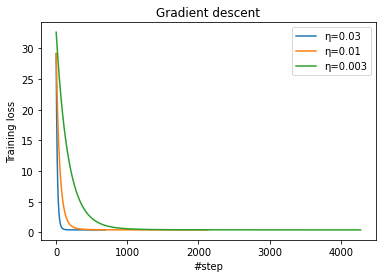

In [0]:
# 各種パラメータ
alpha = 0.01                # 正則化パラメタ
n_update = 10000            # 更新のステップ数
etas = [0.03, 0.01, 0.003]  # ステップサイズ
conv_condition = 1e-6       # 収束の判定としてに使う改善の幅
np.random.seed(seed=0)

plt.figure()
for eta in etas:
  loss_history = [] 
  w = np.random.rand(len(X_train[0]),)        # initialize parameter
  for i in range(n_update):
    pred = np.dot(X_train, w)
    error = pred - y_train
    w_pre = w
    w = w - (1/m)*eta*((X_train.T.dot(error)) + alpha * 2 * w)  # parameter update
    
    loss = mean_squared_error(y_train, np.dot(X_train,w)) + alpha/m*np.dot(w,w)        # calculate loss
    loss_history.append(loss)

    # 収束判定
    if len(loss_history) > 1 and loss_history[-2] - loss_history[-1] < conv_condition:
      print(f"η = {eta}, iter = {i}, loss = {loss_history[-1]}")
      break

  plt.plot(range(1, i+2), loss_history, label="η=" + str(eta))

plt.xlabel("#step")
plt.ylabel("Training loss")
plt.title("Gradient descent")
plt.legend()

plt.show()